In [3]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc=SparkContext.getOrCreate()
spark=SparkSession(sc)
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
df = spark.read.csv('Movies.csv',inferSchema=True,header=True)

df.show()


+----+------+--------------------+-------+--------------------+-----------------+--------------------+----------+------+-------------------+
|Year|Length|               Title|  Genre|               Actor|          Actress|            Director|Popularity|Awards|              Image|
+----+------+--------------------+-------+--------------------+-----------------+--------------------+----------+------+-------------------+
|1990|   111|Tie Me Up! Tie Me...| Comedy|     BanderasAntonio|    AbrilVictoria|      AlmodóvarPedro|        68|    No|   NicholasCage.png|
|1991|   113|          High Heels| Comedy|          BoséMiguel|    AbrilVictoria|      AlmodóvarPedro|        68|    No|   NicholasCage.png|
|1983|   104|        Dead ZoneThe| Horror|   WalkenChristopher|      AdamsBrooke|     CronenbergDavid|        79|    No|   NicholasCage.png|
|1979|   122|                Cuba| Action|         ConnerySean|      AdamsBrooke|       LesterRichard|         6|    No|    seanConnery.png|
|1978|    94|

In [ ]:
# 6. Find the title, year, and director of action films that won an award.
one = df.filter((df['Genre']=='Action') & (df['Awards']=='Yes'))
one.select(df.Title,df.Year,df.Director).show()

+-----+----+--------+
|Title|Year|Director|
+-----+----+--------+
+-----+----+--------+



In [ ]:
# 7. For each award-winning actor, find the movies he acted it. Print the names of the movies and the director of the
# movie.
from pyspark.sql.functions import collect_list, struct
two = df.filter(df.Awards == 'Yes')
result = two.groupBy(df.Actor).agg(collect_list(struct('Title', 'Director'))).alias('Movies')
result.show(truncate=False)

+-----------------+------------------------------------------------------------------------------------------------------------------+
|Actor            |collect_list(struct(Title, Director))                                                                             |
+-----------------+------------------------------------------------------------------------------------------------------------------+
|LintDerek De     |[{AssaultThe, RademakersFons}]                                                                                    |
|LancasterBurt    |[{Airport, SeatonGeorge}, {Come BackLittle Sheba, MannDaniel}]                                                    |
|BridgesBeau      |[{Norma Rae, RittMartin}]                                                                                         |
|CapolicchioLino  |[{Garden of the Finzi-ContinisThe, De SicaVittorio}]                                                              |
|LoneJohn         |[{Last EmperorThe, BertolucciBernard

In [ ]:
# 8. Find the top 10 most popular movies that did not win an award.
three = df.filter(df.Awards != 'Yes').orderBy(df.Popularity,ascending=False)
three.select('Title').limit(10).show()

+--------------------+
|               Title|
+--------------------+
|        Five Corners|
|Ballad of Narayam...|
|         Let It Ride|
|        Final Notice|
|      New Year's Day|
| Guilty by Suspicion|
|   Fellini Satyricon|
|           Raw Nerve|
|     Time MachineThe|
| Long Voyage HomeThe|
+--------------------+



In [ ]:
# 9. Find the 10 least popular movies that were released before 1980.
four = df.filter(df.Year < 1980).orderBy(df.Popularity)
four.select('Title').limit(10).show()


+------------------+
|             Title|
+------------------+
|   White Lightning|
|      Drop KickThe|
|      Desert Rider|
| Bank on the Stars|
|           Shalako|
|           Airport|
|     Anna Christie|
|Shout at the Devil|
| Tales of Tomorrow|
|         Holocaust|
+------------------+



In [ ]:
# 10. Sort the movie’s release before 1990 by the title
five = df.filter(df.Year < 1990).orderBy(df.Title)
five.select('Title').show()

+--------------------+
|               Title|
+--------------------+
|2001: A Space Ody...|
|             48 Hrs.|
|               8 1/2|
|A Big Hand for th...|
|  A Child Is Waiting|
|A Chorus LineThe ...|
|  A Clockwork Orange|
|A Coeur Joie(Head...|
|   A Cry in the Dark|
|  A Dry White Season|
|      A Fine Madness|
| A Fish Called Wanda|
|A Fistful of Dollars|
|     A Guy Named Joe|
|    A Lesson in Love|
|A Little Night Music|
|     A Man & a Woman|
|A Man & a Woman: ...|
|A Man for All Sea...|
|    A Matter of Time|
+--------------------+
only showing top 20 rows



In [9]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import pandas as pd

Explore and preprocess the “wine” data set which was given you in previous lab, use spark
dataframes and analyse it. Find the outliers or noise in the data and find the correlation
between different features.

# Example code for kmeans

In [4]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation



data = [(Vectors.sparse(4, [(0, 1.0), (3, -2.0)]),),
(Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
(Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
(Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),)]
df = spark.createDataFrame(data, ["features"])
r1 = Correlation.corr(df, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))
r2 = Correlation.corr(df, "features", "spearman").head()
print("Spearman correlation matrix:\n" + str(r2[0]))

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Pearson correlation matrix:
DenseMatrix([[1.        , 0.05564149,        nan, 0.40047142],
             [0.05564149, 1.        ,        nan, 0.91359586],
             [       nan,        nan, 1.        ,        nan],
             [0.40047142, 0.91359586,        nan, 1.        ]])
Spearman correlation matrix:
DenseMatrix([[1.        , 0.10540926,        nan, 0.4       ],
             [0.10540926, 1.        ,        nan, 0.9486833 ],
             [       nan,        nan, 1.        ,        nan],
             [0.4       , 0.9486833 ,        nan, 1.        ]])


In [5]:
df = spark.read.csv('wine.csv',inferSchema=True,header=True)

In [6]:
# check the schema of the dataframe
df.printSchema()
# check the first few rows of the dataframe
df.show(5)
# check the number of rows in the dataframe
df.count(), len(df.columns)
# describe the dataframe
df.describe().show()


root
 |-- Alcohol: double (nullable = true)
 |-- Malic_Acid: double (nullable = true)
 |-- Ash: double (nullable = true)
 |-- Ash_Alcanity: double (nullable = true)
 |-- Magnesium: integer (nullable = true)
 |-- Total_Phenols: double (nullable = true)
 |-- Flavanoids: double (nullable = true)
 |-- Nonflavanoid_Phenols: double (nullable = true)
 |-- Proanthocyanins: double (nullable = true)
 |-- Color_Intensity: double (nullable = true)
 |-- Hue: double (nullable = true)
 |-- OD280: double (nullable = true)
 |-- Proline: integer (nullable = true)

+-------+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+
|Alcohol|Malic_Acid| Ash|Ash_Alcanity|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280|Proline|
+-------+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+
|  14.23|

In [7]:
# Select relevant feature columns
feature_cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
cluster_df = df.select(feature_cols)

cluster_df.limit(5).toPandas().head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
from pyspark.ml.feature import VectorAssembler
## 1. Assemble features into a vector
vecAssembler = VectorAssembler(inputCols=feature_cols, outputCol="vecfeatures")

## 2. Scale the features to have mean 0 and standard deviation 1
scaler = StandardScaler(inputCol="vecfeatures", outputCol="features",
                        withStd=True, withMean=True)

## 3. Initialize the K-Means algorithm
kmeans = KMeans(k=3, seed=1)

# Assemble Pipeline
pipeline = Pipeline(stages=[vecAssembler, scaler, kmeans])

In [11]:
# Fit the pipeline
model = pipeline.fit(cluster_df)

# Make a prediction
prediction = model.transform(cluster_df)

prediction.select('vecfeatures', 'features', 'prediction').limit(5).toPandas().head()

,vecfeatures,features,prediction
0,"[14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0....","[1.514340767292143, -0.5606682205167597, 0.231...",1
1,"[13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0....","[0.24559682781702233, -0.49800855572495045, -0...",1
2,"[13.16, 2.36, 2.67, 18.6, 101.0, 2.8, 3.24, 0....","[0.19632521851701873, 0.021171523978611544, 1....",1
3,"[14.37, 1.95, 2.5, 16.8, 113.0, 3.85, 3.49, 0....","[1.6867913998421578, -0.34583508408769953, 0.4...",1
4,"[13.24, 2.59, 2.87, 21.0, 118.0, 2.8, 2.69, 0....","[0.2948684371170281, 0.22705327972312755, 1.83...",1


In [12]:

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(prediction)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.4486177677626632


In [13]:
model.stages


[VectorAssembler_7235b280b83d,
 StandardScalerModel: uid=StandardScaler_7de7812f6807, numFeatures=13, withMean=true, withStd=true,
 KMeansModel: uid=KMeans_fa5d5dc7d2f5, k=3, distanceMeasure=euclidean, numFeatures=13]

In [14]:
centers = model.stages[2].clusterCenters()
centers_df = pd.DataFrame(centers)
centers_df.columns = cluster_df.columns

centers_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-0.924213,-0.369990,-0.449011,0.210647,-0.603158,-0.056864,0.036168,-0.004693,0.002312,-0.901457,0.445603,0.275072,-0.774290
1,0.778731,-0.328352,0.293480,-0.624035,0.653706,0.834184,0.930073,-0.572334,0.617305,0.139194,0.486940,0.756219,1.085678
2,0.164444,0.869095,0.186373,0.522892,-0.075260,-0.976575,-1.211829,0.724021,-0.777513,0.938890,-1.161512,-1.288776,-0.405943


In [15]:
prediction.groupBy('prediction').count().show()


+----------+-----+
|prediction|count|
+----------+-----+
|         1|   64|
|         2|   51|
|         0|   63|
+----------+-----+



In [16]:
def run_clustering(k):
  # Define and assemble the Pipeline
  vecAssembler = VectorAssembler(inputCols=feature_cols, outputCol="vecfeatures")
  scaler = StandardScaler(inputCol="vecfeatures", outputCol="features",
                          withStd=True, withMean=True)
  kmeans = KMeans(k=k, seed=1)
  pipeline = Pipeline(stages=[vecAssembler, scaler, kmeans])

  # Fit the pipeline
  model = pipeline.fit(cluster_df)

  # Make a prediction
  prediction = model.transform(cluster_df)

  # Evaluate clustering by computing Silhouette score
  evaluator = ClusteringEvaluator()
  silhouette = evaluator.evaluate(prediction)

  # Cluster centers
  centers = model.stages[2].clusterCenters()
  centers_df = pd.DataFrame(centers)
  centers_df.columns = cluster_df.columns

  # Cluster frequencies
  cluster_freq = prediction.groupBy('prediction').count()

  out = {
      "silhouette": silhouette,
      "centers": centers_df,
      "freq": cluster_freq
  }

  return(out)

In [17]:

k_values = list(range(3,20))

k_clustering = [run_clustering(i) for i in k_values]

silhouette_results = [{"k": k, "silhouette": i['silhouette']} for k,i in zip(k_values, k_clustering)]

silhouette_df = pd.DataFrame(silhouette_results)

<Axes: title={'center': 'Silhouette score for a range of K values'}, xlabel='k'>

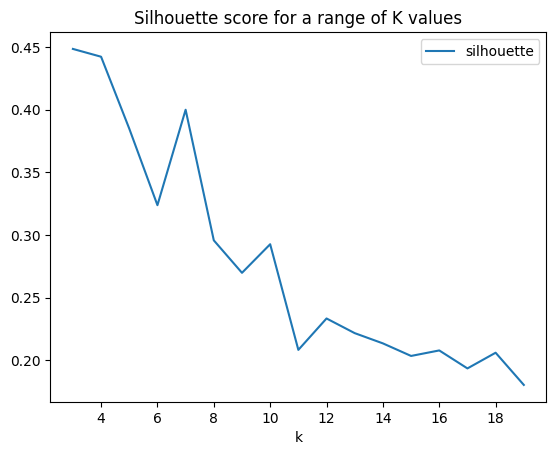

In [18]:
silhouette_df.plot.line(x='k', y='silhouette', title = "Silhouette score for a range of K values")
